# Ford GoBike System Data
## by Ahmed Omran

## Important note , you must run the exploration first as this slide is dependant on it . 
## Investigation Overview

 Ford GoBike is a regional public bike sharing system in the San Francisco Bay Area, Californiaو with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. This exploration and visualization study primarily focuses on finding the bike usage pattern and customer habit characteristics from the 12-month ride trips data in 2018.

## Dataset Overview

The dataset used for this exploratory analysis consists of [monthly individual trip data](https://www.lyft.com/bikes/bay-wheels/system-data) from January 2018 to December 2018 in CSV format covering the greater San Francisco Bay area, raw data is available [here](https://s3.amazonaws.com/baywheels-data/index.html).

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [ ]:
# load in the dataset into a pandas dataframe and clean up field dtypes
trips = pd.read_csv('fordgobike_trips_2018_clean.csv')

trips['start_time'] = pd.to_datetime(trips['start_time'])
trips['end_time'] = pd.to_datetime(trips['end_time'])

trips['start_station_id'] = trips['start_station_id'].astype('str')
trips['end_station_id'] = trips['end_station_id'].astype('str')
trips['bike_id'] = trips18['bike_id'].astype('str')

trips['user_type'] = trips18['user_type'].astype('category')
trips['member_gender'] = trips1['member_gender'].astype('category')

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
trips['start_dayofweek'] = trips['start_dayofweek'].astype(weekdaycat)

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
trips1['start_month'] = trips['start_month'].astype(monthcat)
# change the data type for bike_share_for_all_trip to be bool
trips.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')
trips.info(null_counts=True)


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of User Age

In the case of age, you can see that the distribution is more concentrated between 20 to 40 years old.

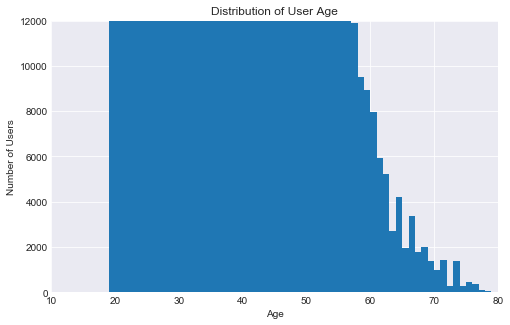

In [12]:
# Plotting age distribution derived from member's birth year.
binsize = 1
bins = np.arange(0, trips['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = trips.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

## Distribution of Trip Durations

Trip Durations in the dataset take on a very large range of values. Number of Trips values first increases starting from around 8000 values to 12500 values at peak around 600 seconds but then starts to fall below at 2000 values.

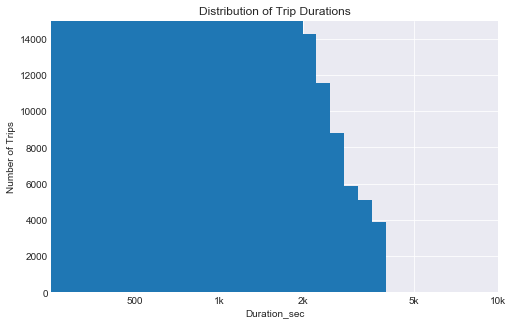

In [9]:
log_binsize = 0.05
bins_log = 10 ** np.arange(2.4, np.log10(trips['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = trips, x = 'duration_sec', bins = bins_log)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()

## Trip Duration vs. Age

By looking at the chart below, we can see that most frequent users aged between 20 and 45. As remark, duration is registered by younger members.

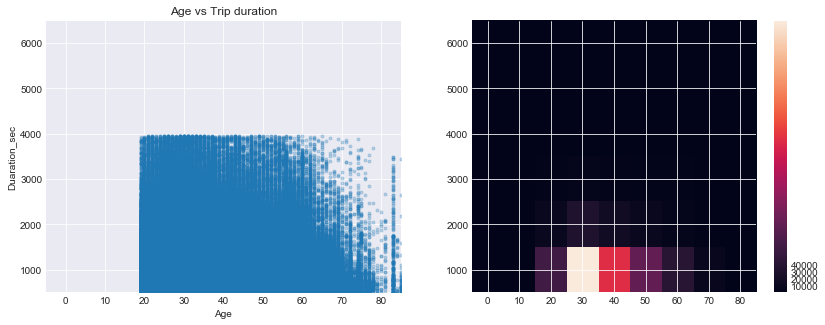

In [16]:
# As you can see, the most of the durations are below 6000 and age is below 80, I need to crop the plot to those values.

plt.figure(figsize=[14,5])

plt.subplot(1, 2, 1)
plt.scatter((2019 - trips['member_birth_year']), trips['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([-5, 85, 500, 6500])
plt.title('Age vs Trip duration')
plt.xlabel('Age')
plt.ylabel('Duaration_sec')

plt.subplot(1, 2, 2)
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d((2019 - trips['member_birth_year']), trips['duration_sec'],
           bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000, 40000]);
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

## Summary

 - Subscribers used the system heavily on work days concentrated around 8-9am and 17-18pm for work commute, whereas customers ride a lot over weekends and in the afternoon for leisure/touring purposes
 - Subscribers tended to have much shorter/quicker trips compared to customers which makes subscriber usage more efficient.